Iter.	xopt	f(xopt)	Error %
  1	1.7082	5.0075	82.91796
  2	2.5836	5.6474	33.8826
  3	2.5836	5.6474	20.9406
  4	2.2492	5.8672	14.86595
  5	2.2492	5.8672	9.18766
  6	2.3769	5.877	5.37318
  7	2.3769	5.877	3.32081
  8	2.3282	5.8853	2.09538
  9	2.3282	5.8853	1.29502
  10	2.3282	5.8853	0.80036
  11	2.3282	5.8853	0.49465
  12	2.3282	5.8853	0.30571
  13	2.3282	5.8853	0.18894
  14	2.3282	5.8853	0.11677
  15	2.3265	5.8853	0.07222


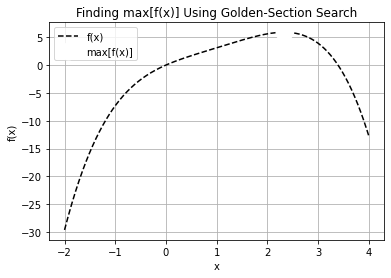

In [6]:
from __future__ import division
from math import *
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

# Golden-section search 
def GSS_iter( xL, xR, es ):
    
    phi = (1.0 + sqrt(5.0))/2.0
    iter = 1
    
    err = 100.0 # Initial error (%)

    # Print column headers
    print ('%s\t%s\t%s\t%s' % ('Iter.','xopt','f(xopt)','Error %'))

    # Iterate until termination criterion is reached
    while err > es:
        
        d = (phi - 1)*(xR - xL)
        a = xR - d
        b = xL + d
        
        if func(b) < func(a):
            
            xopt = a
            xR = b
            
        else:
            
            xopt = b
            xL = a
           
        err = ((2.0 - phi)*abs((xR - xL)/xopt))*100.0

        # Print iteration, x-optimal, f(x-optimal), %Error 
        print ('  %s\t%s\t%s\t%s' % (int(iter),
                                    round(xopt, 4),
                                    round(func(xopt),4),
                                    round(err, 5)))
        iter += 1
    return xopt

# Function to evaluate for max[f(x)]
def func( x ):

    f = -0.3*x**4 + 1.2*x**3 - 1.8*x**2 + 4.0*x
    
    return f

###############################################
es = 0.1   # Stopping criterion
xL = -2.0  # Initial guesses
xR = 4.0

# Call the iterative solver
xopt = GSS_iter(xL, xR, es)

# Plot equation to check GSS
iter = 0
x = np.linspace(-2,4, 1000)
f = np.linspace(0, 0,len(x))

f = func(x)

p1, = plt.plot(x, f, 'k--', label='f(x)')
p2, = plt.plot(xopt, func(xopt),'ow',
               label='max[f(x)]', markersize=15, markeredgewidth=3)
plt.title('Finding max[f(x)] Using Golden-Section Search')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='best',
           handler_map={p2: HandlerLine2D(numpoints=1)})
plt.grid(True)
plt.show()

